# Group 3 Project

### Import Libraries

In [1]:
# Import the necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sbn 
import matplotlib
import matplotlib.pyplot as plt

### Read data source

In [3]:
# Read data source
file_path = "https://raw.githubusercontent.com/IB38224/Meditechy-COVID_19-Group3/main/full_grouped.csv"

covid_data= pd.read_csv(file_path)

In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           35156 non-null  object
 1   Date.1         35156 non-null  object
 2   Confirmed      35156 non-null  int64 
 3   Deaths         35156 non-null  int64 
 4   Recovered      35156 non-null  int64 
 5   Active         35156 non-null  int64 
 6   New cases      35156 non-null  int64 
 7   New deaths     35156 non-null  int64 
 8   New recovered  35156 non-null  int64 
 9   WHO Region     35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [5]:
covid_data.head()

,Date,Date.1,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,1/22/2020,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,1/22/2020,Albania,0,0,0,0,0,0,0,Europe
2,1/22/2020,Algeria,0,0,0,0,0,0,0,Africa
3,1/22/2020,Andorra,0,0,0,0,0,0,0,Europe
4,1/22/2020,Angola,0,0,0,0,0,0,0,Africa


### Task-1 Data cleaning

In [6]:
# Checking missing values

rows_with_missing_values = covid_data[covid_data.isnull().any(axis=1)]
print(rows_with_missing_values)

Empty DataFrame
Columns: [Date, Date.1, Confirmed, Deaths, Recovered, Active, New cases, New deaths, New recovered, WHO Region]
Index: []


In [9]:
# Rename the Date.1 column to Country
renamed_column = {'Date.1':'Country'}
covid_data = covid_data.rename(columns=renamed_column)

covid_data

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,1/22/2020,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,1/22/2020,Albania,0,0,0,0,0,0,0,Europe
2,1/22/2020,Algeria,0,0,0,0,0,0,0,Africa
3,1/22/2020,Andorra,0,0,0,0,0,0,0,Europe
4,1/22/2020,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,7/27/2020,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,7/27/2020,Western Sahara,10,1,8,1,0,0,0,Africa
35153,7/27/2020,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,7/27/2020,Zambia,4552,140,2815,1597,71,1,465,Africa


In [8]:
# Removing duplicate rows if any
covid_data = covid_data.drop_duplicates()
covid_data

# using the new data set after removing the duplicates

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,1/22/2020,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,1/22/2020,Albania,0,0,0,0,0,0,0,Europe
2,1/22/2020,Algeria,0,0,0,0,0,0,0,Africa
3,1/22/2020,Andorra,0,0,0,0,0,0,0,Europe
4,1/22/2020,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,7/27/2020,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,7/27/2020,Western Sahara,10,1,8,1,0,0,0,Africa
35153,7/27/2020,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,7/27/2020,Zambia,4552,140,2815,1597,71,1,465,Africa


### Task-2 grouping

In [10]:
# Group three - countries to focus

countries_to_focus = ['El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini',
                        'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
                       'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada','Guatemala',
                       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 
                       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 
                       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo'
                    ]

# countries_to_focus = ['El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini']

grouped_covid_data = covid_data[covid_data['Country'].isin(countries_to_focus)]

In [11]:
# total number of confirmed cases
total_confirmed_cases = grouped_covid_data.groupby('Country')['Confirmed','Deaths','Recovered'].sum().reset_index()
total_confirmed_cases

<ipython-input-11-d3726007a3e6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_confirmed_cases = grouped_covid_data.groupby('Country')['Confirmed','Deaths','Recovered'].sum().reset_index()


,Country,Confirmed,Deaths,Recovered
0,El Salvador,453036,11429,240972
1,Equatorial Guinea,153258,2246,35352
2,Eritrea,11786,0,5724
3,Estonia,216505,6826,137224
4,Eswatini,63160,763,30185
5,Ethiopia,357928,5887,121793
6,Fiji,2266,0,1568
7,Finland,713167,30338,544492
8,France,21210926,3048524,7182115
9,Gabon,330678,2497,146671


In [13]:
# total number of deaths
# total_deaths = grouped_covid_data.groupby('Country')['Deaths'].sum().reset_index()
# total_deaths

In [14]:
# total number of recoveries
# total_recovered = grouped_covid_data.groupby('Country')['Recovered'].sum().reset_index()
# total_recovered

In [15]:
# Distribution of COVID-19 cases vary across different countries

#draw charts, or calculate mean,... to show variation

### Task-3 Pivot Tables

In [16]:
grouped_covid_data['Date'] = pd.to_datetime(grouped_covid_data['Date'])

grouped_covid_data.head()

<ipython-input-16-1405c122b2ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_covid_data['Date'] = pd.to_datetime(grouped_covid_data['Date'])


,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
53,2020-01-22,El Salvador,0,0,0,0,0,0,0,Americas
54,2020-01-22,Equatorial Guinea,0,0,0,0,0,0,0,Africa
55,2020-01-22,Eritrea,0,0,0,0,0,0,0,Africa
56,2020-01-22,Estonia,0,0,0,0,0,0,0,Europe
57,2020-01-22,Eswatini,0,0,0,0,0,0,0,Africa


In [17]:
# pivotal table - total cases, total deaths, total recoveries
pivotal_by_date_country = grouped_covid_data.pivot_table(index=['Date', 'Country'],
                             values=['Confirmed', 'Deaths', 'Recovered'],
                             aggfunc='sum')
pivotal_by_date_country

Confirmed  Deaths  Recovered
Date       Country                                        
2020-01-22 El Salvador                0       0          0
           Equatorial Guinea          0       0          0
           Eritrea                    0       0          0
           Estonia                    0       0          0
           Eswatini                   0       0          0
...                                 ...     ...        ...
2020-07-27 Japan                  31142     998      21970
           Jordan                  1176      11       1041
           Kazakhstan             84648     585      54404
           Kenya                  17975     285       7833
           Kosovo                  7413     185       4027

[7332 rows x 3 columns]

### Task-4 Time series analysis

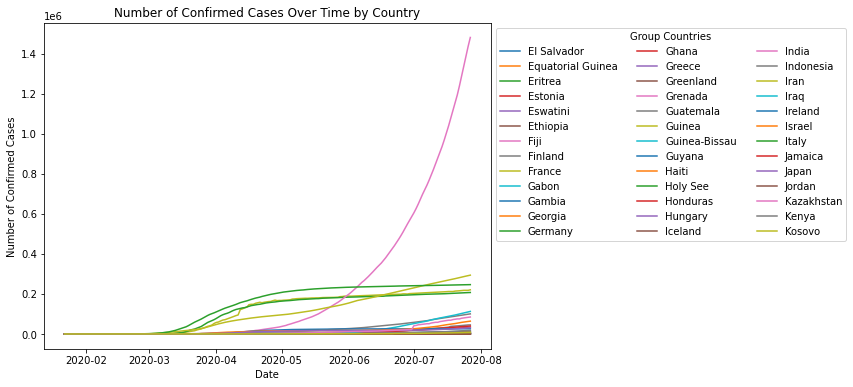

In [32]:
# 
plt.figure(figsize=(8, 6))
# grouped_covid_data['Date'] = pd.to_datetime(grouped_covid_data['Date'])  
# grouped_covid_data.set_index('Date', inplace=True)

for country, grouped_covid in grouped_covid_data.groupby('Country'):
    plt.plot(grouped_covid['Date'], grouped_covid['Confirmed'], label=country)

# grouped_covid_data['Confirmed'].plot(figsize=(12, 6))
plt.title('Number of Confirmed Cases Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
# plt.yticks(range(0, max(plt.yticks()[0]) + 1, 10))
plt.legend(bbox_to_anchor=(1, 1),ncol=3, title='Group Countries')
plt.show()

In [ ]:
### Are there any noticeable trends or patterns in the data?


### Task-5 Plotting with Matplotlib/Seaborn

<ipython-input-19-59685604715b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_covid_data['Date'] = pd.to_datetime(selected_covid_data['Date'])


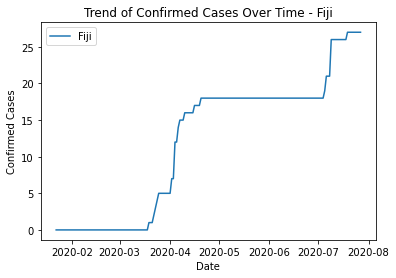

In [19]:
#line plot showing the trend of confirmed cases over time for a specific country
selected_country = 'Fiji'
selected_covid_data = covid_data[covid_data['Country']==selected_country]

selected_covid_data['Date'] = pd.to_datetime(selected_covid_data['Date']) 
plt.plot(selected_covid_data['Date'], selected_covid_data['Confirmed'], label=selected_country)
plt.title(f'Trend of Confirmed Cases Over Time - {selected_country}')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

In [25]:
#How does the number of confirmed cases compare between different countries


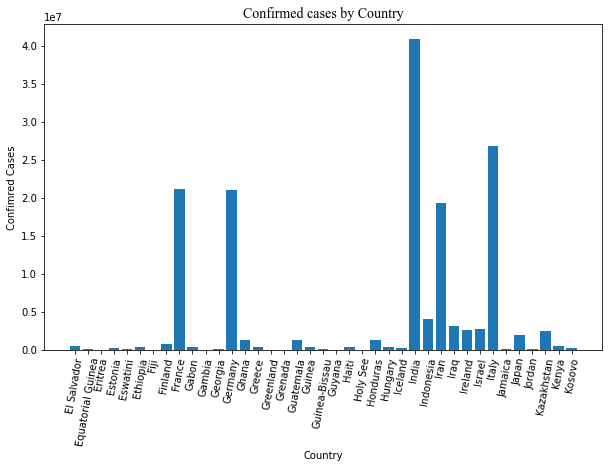

In [23]:
# Can you visualize this comparison using a bar plot or a heatmap?

confimed_cases_agg = grouped_covid_data.groupby('Country')['Confirmed'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(confimed_cases_agg['Country'], confimed_cases_agg['Confirmed'])

plt.title("Confirmed cases by Country", fontsize=14, fontfamily="Times New Roman")
plt.xlabel("Country")
plt.ylabel("Confimred Cases")
plt.xticks(rotation=80)
plt.show()

# Bonus

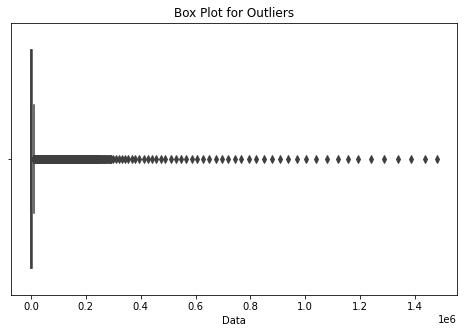

In [36]:
# Using Box plot

plt.figure(figsize=(8, 5))
sbn.boxplot(x=grouped_covid_data['Confirmed'])
plt.title('Box Plot for Outliers')
plt.xlabel('Data')
plt.show()

In [50]:
# Z-score for checking outlier

from scipy.stats import zscore
grouped_covid_data['zscore'] = zscore(grouped_covid_data['Confirmed'])
outliers = grouped_covid_data[abs(grouped_covid_data['zscore']) > 3]

# print("Outliers:")
# print(outliers)
outliers

<ipython-input-50-5d318fb5149e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_covid_data['zscore'] = zscore(grouped_covid_data['Confirmed'])


,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,zscore
25885,2020-06-08,India,265928,7473,129095,129360,8442,266,5247,South-East Asia,3.061596
26072,2020-06-09,India,276146,7750,134670,133726,10218,277,5575,South-East Asia,3.189385
26259,2020-06-10,India,286605,8102,135206,143297,10459,352,536,South-East Asia,3.320188
26446,2020-06-11,India,297535,8498,147195,141842,10930,396,11989,South-East Asia,3.456881
26633,2020-06-12,India,308993,8884,154330,145779,11458,386,7135,South-East Asia,3.600178
...,...,...,...,...,...,...,...,...,...,...,...
34676,2020-07-25,Iran,288839,15484,251319,22036,2316,195,2107,Eastern Mediterranean,3.348127
34861,2020-07-26,India,1435616,32771,917568,485277,49981,711,31995,South-East Asia,17.690013
34863,2020-07-26,Iran,291172,15700,253213,22259,2333,216,1894,Eastern Mediterranean,3.377304
35048,2020-07-27,India,1480073,33408,951166,495499,44457,637,33598,South-East Asia,18.246004


In [ ]:
# data distribution [normal] check
# 